In [1]:
from pandas import read_csv
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
#load dataset

df = read_csv('cleaned_dataset.csv')
df.shape

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (23,24,29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(300440, 41)

In [4]:
df.head(100)

,Unnamed: 0,Year,Quarter,Month,DayofMonth,DayOfWeek,Carrier,Origin,OriginState,OriginWac,Dest,DestState,DestWac,CRSDepTime,DepTimeBlk,CRSArrTime,ArrTimeBlk,CRSElapsedTime,Distance,DistanceGroup,AptPreviousDateDelay,AptNoOfFlight,tmpf,dwpf,relh,drct,sknt,p01i,alti,vsby,gust,skyc1,skyc2,skyc3,skyc4,skyl1,skyl2,skyl3,skyl4,presentwx,IsDelay
0,0,2017,3,7,1,6,WN,ATL,GA,34,MCO,FL,33,600,0600-0659,725,0700-0759,85.0,404.0,2,0.0,881.0,71.1,70,96.32,250.0,4.0,0.0,30.09,7,0.0,OVC,M,M,M,400.0,-1.0,-1.0,-1.0,M,0
1,2,2017,3,7,1,6,OO,LAS,NV,85,SNA,CA,91,1715,1700-1759,1825,1800-1859,70.0,226.0,1,0.0,382.0,107.1,18,4.21,150.0,11.0,0.0,29.71,10,21.0,FEW,M,M,M,20000.0,-1.0,-1.0,-1.0,M,0
2,3,2017,3,7,1,6,OO,LAX,CA,91,DEN,CO,82,1305,1300-1359,1637,1600-1659,152.0,862.0,4,0.0,549.0,71.1,61,70.42,260.0,9.0,0.0,29.88,10,0.0,SCT,SCT,M,M,1900.0,2500.0,-1.0,-1.0,M,0
3,4,2017,3,7,1,6,OO,SEA,WA,93,BOI,ID,83,1850,1800-1859,2123,2100-2159,93.0,399.0,2,0.0,402.0,71.1,53.1,52.96,0.0,0.0,0.0,30.04,10,0.0,CLR,M,M,M,-1.0,-1.0,-1.0,-1.0,M,0
4,5,2017,3,7,1,6,OO,SEA,WA,93,GEG,WA,93,2110,2100-2159,2215,2200-2259,65.0,224.0,1,0.0,402.0,62.1,54,74.75,280.0,3.0,0.0,30.06,10,0.0,CLR,M,M,M,-1.0,-1.0,-1.0,-1.0,M,0
5,6,2017,3,7,1,6,OO,SLC,UT,87,FCA,MT,84,1542,1500-1559,1728,1700-1759,106.0,531.0,3,0.0,287.0,93.0,36,13.55,330.0,10.0,0.0,29.98,10,16.0,FEW,FEW,M,M,10000.0,22000.0,-1.0,-1.0,M,0
6,7,2017,3,7,1,6,OO,SLC,UT,87,FCA,MT,84,1130,1100-1159,1317,1300-1359,107.0,531.0,3,0.0,287.0,82.9,41,22.7,80.0,5.0,0.0,30.05,10,0.0,FEW,FEW,M,M,11000.0,20000.0,-1.0,-1.0,M,1
7,8,2017,3,7,1,6,OO,MSP,MN,63,ATW,WI,45,950,0900-0959,1100,1100-1159,70.0,236.0,1,0.0,343.0,70.0,55,58.94,320.0,10.0,0.0,29.95,10,0.0,FEW,SCT,M,M,15000.0,25000.0,-1.0,-1.0,M,0
8,9,2017,3,7,1,6,OO,SEA,WA,93,DEN,CO,82,1901,1900-1959,2244,2200-2259,163.0,1024.0,5,0.0,402.0,70.0,53.1,54.98,270.0,5.0,0.0,30.05,10,0.0,CLR,M,M,M,-1.0,-1.0,-1.0,-1.0,M,0
9,10,2017,3,7,1,6,OO,DTW,MI,43,FWA,IN,42,2000,2000-2059,2057,2000-2059,57.0,128.0,1,0.0,269.0,78.1,57,48.28,280.0,7.0,0.0,29.92,10,0.0,FEW,FEW,M,M,6000.0,20000.0,-1.0,-1.0,M,0


In [5]:
df = df.drop('Unnamed: 0', axis=1)

In [6]:
df.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Carrier',
       'Origin', 'OriginState', 'OriginWac', 'Dest', 'DestState', 'DestWac',
       'CRSDepTime', 'DepTimeBlk', 'CRSArrTime', 'ArrTimeBlk',
       'CRSElapsedTime', 'Distance', 'DistanceGroup', 'AptPreviousDateDelay',
       'AptNoOfFlight', 'tmpf', ' dwpf', ' relh', ' drct', ' sknt', ' p01i',
       ' alti', ' vsby', ' gust', ' skyc1', ' skyc2', ' skyc3', ' skyc4',
       ' skyl1', ' skyl2', ' skyl3', ' skyl4', ' presentwx', 'IsDelay'],
      dtype='object')

In [7]:
df['skyc1_c'] = df[' skyc1'].astype('category')
df['skyc2_c'] = df[' skyc2'].astype('category')
df['skyc3_c'] = df[' skyc3'].astype('category')
df['skyc4_c'] = df[' skyc4'].astype('category')

In [8]:
for column in df.columns:
    print(df[column].dtype)

int64
int64
int64
int64
int64
object
object
object
int64
object
object
int64
int64
object
int64
object
float64
float64
int64
float64
float64
float64
object
object
float64
float64
float64
float64
object
float64
object
object
object
object
float64
float64
float64
float64
object
int64
category
category
category
category


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300440 entries, 0 to 300439
Data columns (total 44 columns):
Year                    300440 non-null int64
Quarter                 300440 non-null int64
Month                   300440 non-null int64
DayofMonth              300440 non-null int64
DayOfWeek               300440 non-null int64
Carrier                 300440 non-null object
Origin                  300440 non-null object
OriginState             300440 non-null object
OriginWac               300440 non-null int64
Dest                    300440 non-null object
DestState               300440 non-null object
DestWac                 300440 non-null int64
CRSDepTime              300440 non-null int64
DepTimeBlk              300440 non-null object
CRSArrTime              300440 non-null int64
ArrTimeBlk              300440 non-null object
CRSElapsedTime          300440 non-null float64
Distance                300440 non-null float64
DistanceGroup           300440 non-null int64
AptP

In [10]:
numeric_list = ['Year','Quarter','Month','DayofMonth','DayOfWeek','OriginWac','DestWac','CRSDepTime','CRSArrTime','CRSElapsedTime','Distance','DistanceGroup','AptPreviousDateDelay','AptNoOfFlight','tmpf',' drct',' sknt',' p01i',' alti',' gust',' skyl1',' skyl2',' skyl3',' skyl4','IsDelay']

In [11]:
df_numeric = df[numeric_list]

In [12]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300440 entries, 0 to 300439
Data columns (total 25 columns):
Year                    300440 non-null int64
Quarter                 300440 non-null int64
Month                   300440 non-null int64
DayofMonth              300440 non-null int64
DayOfWeek               300440 non-null int64
OriginWac               300440 non-null int64
DestWac                 300440 non-null int64
CRSDepTime              300440 non-null int64
CRSArrTime              300440 non-null int64
CRSElapsedTime          300440 non-null float64
Distance                300440 non-null float64
DistanceGroup           300440 non-null int64
AptPreviousDateDelay    300440 non-null float64
AptNoOfFlight           300440 non-null float64
tmpf                    300440 non-null float64
 drct                   300440 non-null float64
 sknt                   300440 non-null float64
 p01i                   300440 non-null float64
 alti                   300440 non-null float

In [13]:
df_numeric.columns.get_loc('IsDelay')

24

In [14]:
%%time

array = df_numeric.values
X = array[:,0:24]
Y = array[:,24]
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 10)
fit = rfe.fit(X, Y)
print("Num Features: ", fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ",fit.ranking_)

Num Features:  10
Selected Features:  [False False False  True  True  True  True False False False False  True
 False False  True False  True  True  True  True False False False False]
Feature Ranking:  [ 4 15 14  1  1  1  1  3  7  5  8  1  2  9  1  6  1  1  1  1 10 13 12 11]
CPU times: user 2min 9s, sys: 4.52 s, total: 2min 13s
Wall time: 2min 17s


In [15]:
df_numeric.keys()

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'OriginWac',
       'DestWac', 'CRSDepTime', 'CRSArrTime', 'CRSElapsedTime', 'Distance',
       'DistanceGroup', 'AptPreviousDateDelay', 'AptNoOfFlight', 'tmpf',
       ' drct', ' sknt', ' p01i', ' alti', ' gust', ' skyl1', ' skyl2',
       ' skyl3', ' skyl4', 'IsDelay'],
      dtype='object')

In [16]:
from sklearn.model_selection import train_test_split

X, y = df_numeric[['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'OriginWac',
       'DestWac', 'CRSDepTime', 'CRSArrTime', 'CRSElapsedTime', 'Distance',
       'DistanceGroup', 'AptPreviousDateDelay', 'AptNoOfFlight', 'tmpf',
       ' drct', ' sknt', ' p01i', ' alti', ' gust', ' skyl1', ' skyl2',
       ' skyl3', ' skyl4']], df_numeric['IsDelay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### k-Nearest Neighbors model

In [17]:
from sklearn.neighbors import KNeighborsClassifier


In [18]:
#print('Test set prediction: {}'.format(clf.predict(X_test)))

In [19]:
#print(n,'Test set accuracy: {:.2f}'.format(clf.score(X_test, y_test)))

In [ ]:
%%time
import matplotlib.pyplot as plt

training_accuracy = []
test_accuracy = []

#try n_neighbors from 1 to 15
neighbors_settings = range(1,16)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label='training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()


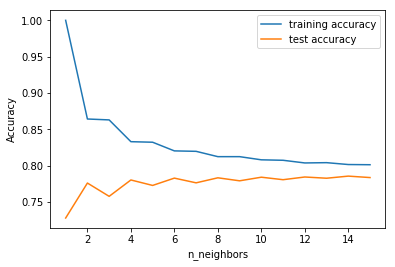

In [21]:
plt.show()

### Decision Tree model

In [22]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print('Accuracy on training set: {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.738


### Random Forest model

In [23]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print('Accuracy on training set: {:.3f}'.format(forest.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.794
